## Config

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import seaborn as sns
sns.set(style="whitegrid")

plt.rc('text', usetex = False)
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font',   size      = SMALL_SIZE)   # controls default text sizes
plt.rc('axes',   titlesize = SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes',   labelsize = MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (7, 5)

In [3]:
def twos_complement(hexstr,bits):    
    value = int(hexstr,16)    
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

In [4]:
def get_data(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    imPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
        strIm = rawArray.iloc[i,3].split('h')[1]
        imPt[i] = twos_complement(strIm,nBits)
    return [t_us, realPt, imPt]

In [5]:
def fft(data, fs):
    vec = data[1] + 1j*data[2]
    fft = np.fft.fftshift(np.fft.fft(vec))
    freq = np.linspace(-fs/2, fs/2, len(fft))
    return [freq, fft]


## Input Data

In [21]:
dataIn = pd.read_table('ruidoSolo/dataIn.lst', sep=' ', skipinitialspace=True, skiprows=3, keep_default_na = False, header=None)

In [22]:
def get_data_real(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
    return [t_us, realPt]

In [25]:
dataInData = get_data_real(dataIn, 16,13000)

(30000000000000.0, 32000000000000.0)

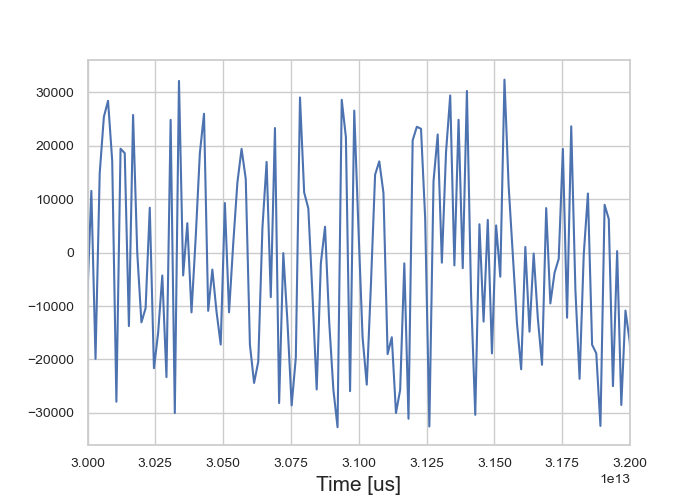

In [13]:
plt.figure()
plt.plot(dataInData[0]*1e6, dataInData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.2e13])

Text(0.5, 0, 'Frequency [MHz]')

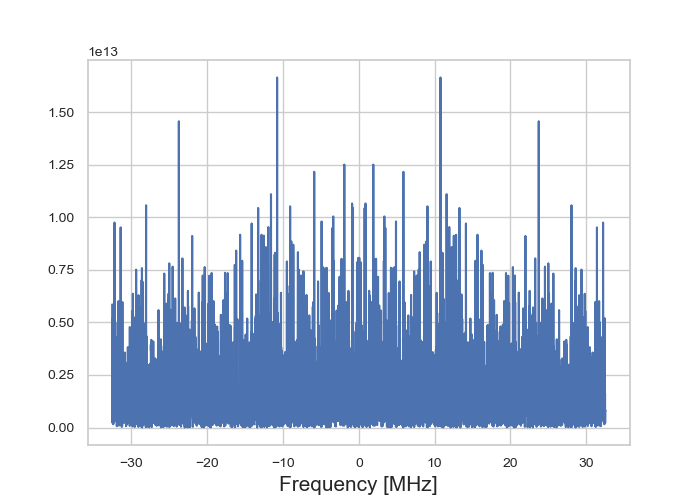

In [15]:
fftData = np.fft.fftshift(np.fft.fft(dataInData[1]))
fs = 65e6
freq = np.linspace(-fs/2, fs/2, len(fftData))
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData)**2)
plt.xlabel('Frequency [MHz]')


In [26]:
len(dataInData[1])

13000

In [27]:
fs = 65e6
grouping_factor = 100
datita = dataInData[1][0:grouping_factor]
length = len(np.fft.fft(datita))
freq = np.linspace(-fs/2, fs/2, length)
fftSum = np.zeros(length)
for i in range(len(dataInData[1])//grouping_factor):
    fftData = np.fft.fftshift(np.fft.fft(dataInData[1][i*grouping_factor:(i+1)*grouping_factor]))
    fftSum += np.abs(fftData)**2

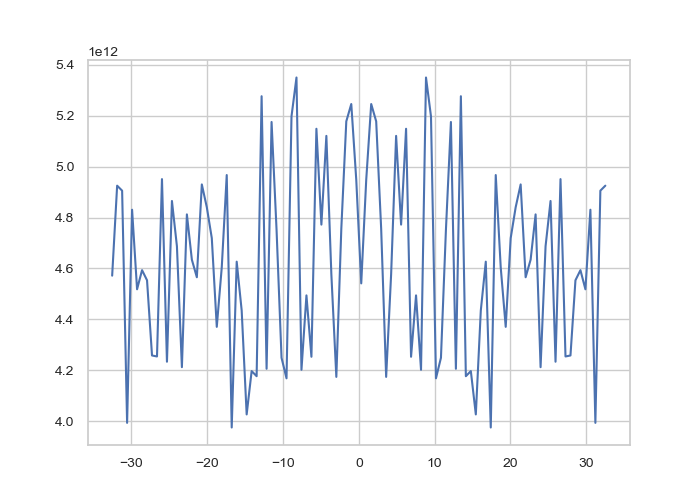

In [28]:
plt.figure()
plt.plot(freq*1e-6, fftSum)